# Soft-sensor para predecir las concentraciones de producto en el proceso de cracking de etileno


## Carga de datos diarios de variables y concentraciones

In [ ]:
import os
path = '/expert/ipython_notebooks/scripts/'
os.chdir(path)
import utils as u
import pandas as pd


file_name = 'short_data.csv'

df = pd.read_csv(file_name, sep=',', header = 0, index_col = 0, parse_dates=True,date_parser=u.dateparse)

df = df.rename(columns = u.translation)

## Selección de la variables independientes y variables objetivo
### Las variables objetivo son : 'H2_B', 'CH4_B', 'C2H4_B', 'C3H6_B'

In [ ]:
X = (df[u.independent_labels]).as_matrix()
Y_label = 'CH4_B'
Y = (df[Y_label]).as_matrix()
Y = Y.reshape(len(Y))

## Particionado del conjunto de datos, se usa la regla habitual de 1/3
### La librería Pandas proporciona métdos de validación con este otro tipo Bootstrap

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, Y, range(len(Y)),test_size=0.3, random_state=1)

## Instanciamos el modelo a usar, en este caso Gradient Boosting.
### Pandas proporciona este algoritmo de fácil uso. La parametrización se ha realizado con un método de búsqueda evolutiva

In [ ]:
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=750, learning_rate=0.1,max_depth=10, loss='quantile',alpha=0.4)

## Entrenamiento del modelo.
### Es interesante conocer la importancia de cada variable en la regresión

In [ ]:
model.fit(X_train, y_train)
print ("Feature importances:"+str(model.feature_importances_))

## Evaluación del modelo.
### Training error

In [25]:
from math import sqrt
from sklearn.metrics.regression import mean_squared_error, r2_score
from numpy import corrcoef

predictions = model.predict(X_train)
nrmse = (sqrt(mean_squared_error(y_train,predictions)) / (max(y_train)-min(y_train)))
print ("RMSE Normalized: " +str(nrmse))
print ("R2 score, coefficient of determination: "+str(r2_score(y_train,predictions)))
print ("1-Correlation coefficient: "+str(1-corrcoef(y_train,predictions)[0][1]))

RMSE Normalized: 0.00102312079026
R2 score, coefficient of determination: 0.999970234266
1-Correlation coefficient: 1.40442163125e-05


#### Visualización de la predicción

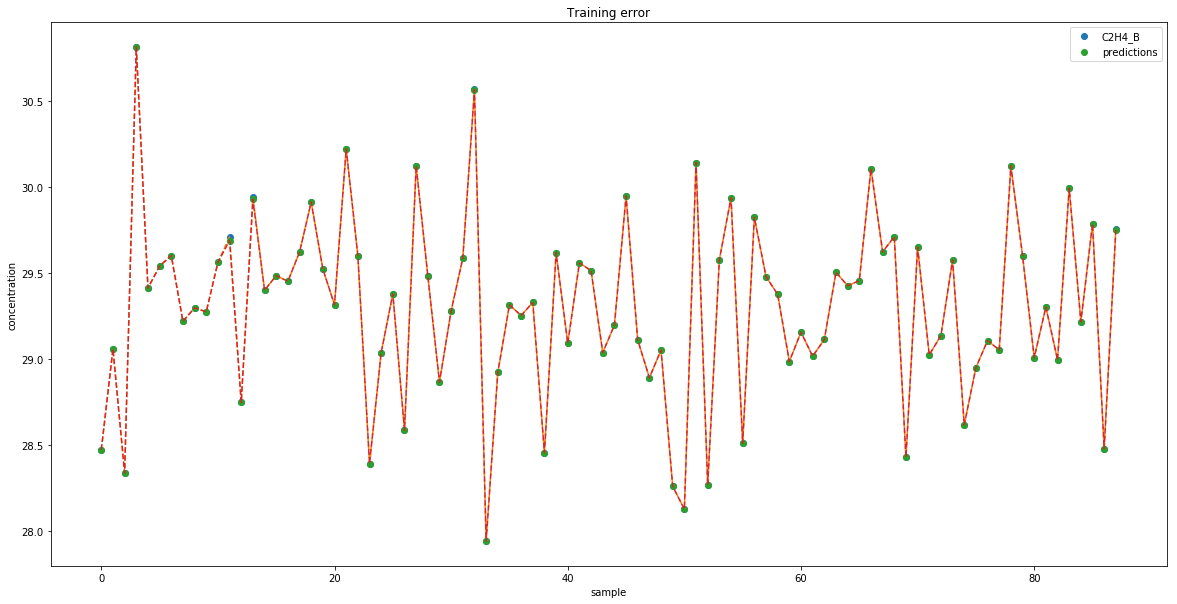

In [26]:
from matplotlib.pyplot import plot,show, figure, bar,legend,title,xlabel,ylabel
figure("Training error",figsize=(20,10))
plot(y_train,'o',label = Y_label)
plot(y_train,'--')
plot(predictions, 'o',label = 'predictions')
plot(predictions, '--')
title("Training error")
xlabel("sample")
ylabel("concentration")
legend(loc='best')
show()

### Error de test

In [27]:
predictions = model.predict(X_test)
nrmse = (sqrt(mean_squared_error(y_test,predictions)) / (max(y_test)-min(y_test)))
print ("\nTest error")
print ("RMSE Normalized: "+str(nrmse))
print ("R2 score, coefficient of determination: "+str(r2_score(y_test,predictions)))
print ("1-Correlation coefficient: "+str(1-corrcoef(y_test,predictions)[0][1]))


Test error
RMSE Normalized: 0.163097541987
R2 score, coefficient of determination: 0.534273451742
1-Correlation coefficient: 0.264620277305


#### Visualización de la predicción

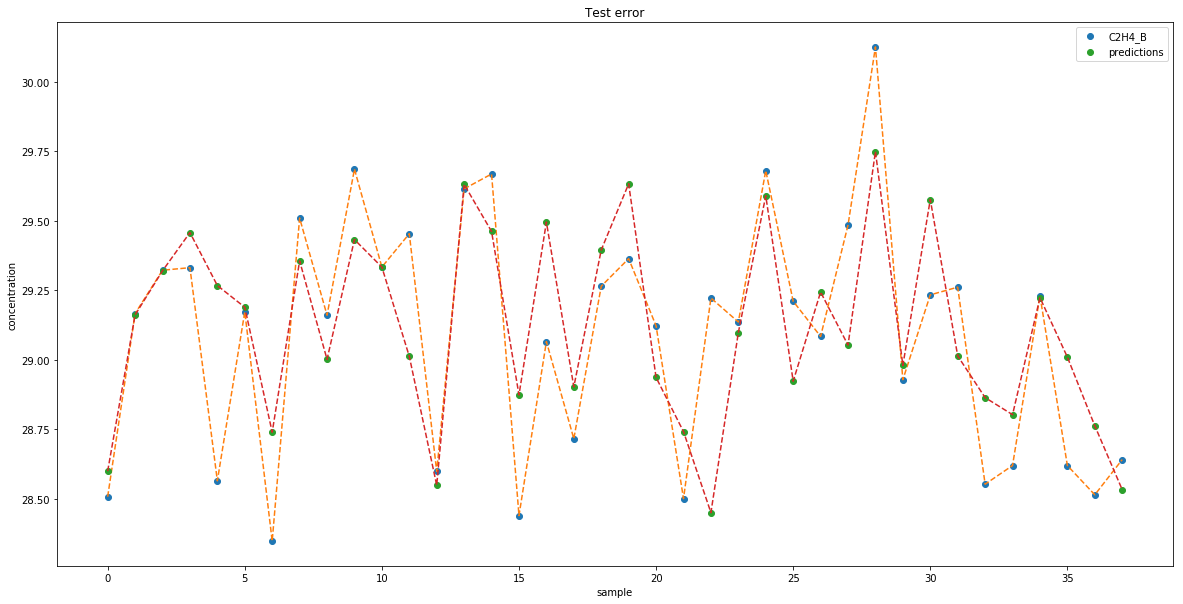

In [28]:
figure("Test error", figsize=(20,10))
plot(y_test,'o',label = Y_label,)
plot(y_test,'--')
plot(predictions, 'o',label = 'predictions')
plot(predictions, '--')
title("Test error")
xlabel("sample")
ylabel("concentration")
legend(loc='best')
show()